# COVID-19, An Analysis

### Joshua Wentling

 data curation, parsing, and management; exploratory data analysis; hypothesis testing and machine learning to provide analysis; and then the curationof a message or messages covering insights learned during the tutorial.

•Identifies a raw data source<dl>•Processes and stores that data<dl>•Performs exploratory data analysis & visualization<dl>•Derives insight(s) using statistics and ML<dl>•Communicates those insights as actionable text

https://www.data.gov/<dl>https://cloud.google.com/bigquery/public-data/<dl>https://www.kaggle.com/datasets<dl>https://aws.amazon.com/public-datasets/

***

## Table of Contents

- Global Analysis
- United States Analysis

## Introduction

On December 31, 2019, the CDC became aware of a cluster of pneumonia cases in Wuhan, China. These, as we later learned, were the first known cases of COVID-19. By January 30, 2020, WHO declared the COVID-19 outbreak a global health emergency. By mid March, much of the U.S. was in lockdown and many state-wide stay-at-home orders were issued.
As of December 2020, the pandemic is growing still with an estimated over 74 million cases worldwide. It has been a rollercoaster of a year, but hopefully with the recent vaccine approvals we will see this pandemic come to an end soon. Until then, people around the world are encouraged to stay at home as much as possible and maintain social distancing measures.
<br><br>
It has been almost a year since the pandemic started. Thanks to the hard work of data scientists, we have data for confirmed cases, deaths, and recoveries for every country around the world for each day since this pandemic started. With that data, we can do a lot of analysis and learn more about how the virus has affected different countries (and different states/provinces within those countries) and possibly even build a model using machine learning based on this data.
This tutorial will walk you through the entire data science pipeline using data related to COVID-19, and hopefully by the end of it you will have learned a thing or two.

<hr>

We will start with our imports. These are all the necessary libraries that we will be using for this tutorial.

In [388]:
# !pip install folium
# !pip install geopandas
import pandas as pd
import folium
from folium import plugins
from folium.plugins import TimeSliderChoropleth
import branca.colormap as cm
import numpy as np
import math

from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

Next, we will import our data from a csv and take a look.

In [389]:
# https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
df = pd.read_csv('Data/Covid/covid_19_data.csv')

pd.set_option('display.max_rows', None)
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [390]:
dftemp = df.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Country/Region'])
dftemp.sort_values(by=['Country/Region'], ascending=False).astype(str)

Country/Region ObservationDate       SNo   Confirmed  \
53007    occupied Palestinian territory      03/10/2020      4593        25.0   
53006                          Zimbabwe      12/06/2020    171890     10718.0   
52744                            Zambia      12/06/2020    171889     17916.0   
52480                             Yemen      12/06/2020    171888      2337.0   
52087                    Western Sahara      07/07/2020     58571        10.0   
51993                West Bank and Gaza      12/06/2020    171886     98038.0   
51737                           Vietnam      12/06/2020    171885      1366.0   
51418                         Venezuela      12/06/2020    171884    104442.0   
51150                      Vatican City      03/09/2020      4507         1.0   
51122                           Vanuatu      11/12/2020    153655         1.0   
51119                        Uzbekistan      12/06/2020    171882     74053.0   
50852                           Uruguay      12/06/2020    171881      7303.0   
50584              United Arab Emirates      12/06/2020    171880    176429.0   
50271                           Ukraine      12/06/2020   4649847    834913.0   
49992                            Uganda      12/06/2020    171879     22499.0   
49731                                US      12/06/2020   9987689  14757000.0   
49411                                UK      12/06/2020   2582103   1727751.0   
49100                            Turkey      12/06/2020    171878    828295.0   
48829                           Tunisia      12/06/2020    171877    104002.0   
48551               Trinidad and Tobago      12/06/2020    171876      6767.0   
48283                              Togo      12/06/2020    171875      3095.0   
48007                       Timor-Leste      12/06/2020    171874        31.0   
47743                        The Gambia      03/17/2020      6429         1.0   
47739                       The Bahamas      03/18/2020      6706         1.0   
47736                          Thailand      12/06/2020    171873      4107.0   
47351                          Tanzania      10/02/2020    123091       509.0   
47150                        Tajikistan      12/06/2020    171871     12428.0   
46929                            Taiwan      12/06/2020    171870       716.0   
46609                             Syria      12/06/2020    171869      8403.0   
46348                       Switzerland      12/05/2020    171108    344497.0   
46062                            Sweden      12/05/2020   3601190    278912.0   
45752                          Suriname      12/06/2020    171867      5324.0   
45484                             Sudan      12/06/2020    171866     19468.0   
45215                        St. Martin      03/09/2020      4412         2.0   
45214                         Sri Lanka      12/06/2020    171865     27877.0   
44897                             Spain      12/04/2020   3410888   1684647.0   
44589                       South Sudan      12/06/2020    171864      3181.0   
44343                       South Korea      12/06/2020    171863     38161.0   
44023                      South Africa      12/06/2020    171862    814565.0   
43743                           Somalia      12/03/2020    169581      4525.0   
43480                   Solomon Islands      12/06/2020    171860        17.0   
43424                          Slovenia      12/06/2020    171859     85805.0   
43147                          Slovakia      12/06/2020    171858    116731.0   
42871                         Singapore      12/06/2020    171857     58260.0   
42552                      Sierra Leone      12/06/2020    171856      2426.0   
42301                        Seychelles      12/06/2020    171855       184.0   
42033                            Serbia      12/06/2020    171854    219652.0   
41757                           Senegal      12/06/2020    171853     16477.0   
41477                      Saudi Arabia      12/06/2020 

Let's start by making a line graph of cases over time.

We'll make a copy of the original dataframe so that we can make edits for our line graph. The original dataset breaks the cases down by province/state. For this graph, we will just be looking at the data per country. To account for this, we will sume the data by country and oberservation date.

In [391]:
dfl = df.copy()
# dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
# Get the sum of all confirmed cases in every country for each day
dfl = dfl.groupby(['ObservationDate'], as_index=False).sum()
# dfl = dfl[['Country/Region','ObservationDate','Confirmed']]
# Remove all unnecessary data
dfl = dfl[['ObservationDate','Confirmed']]
dfl.head()

ObservationDate  Confirmed
0      01/22/2020      555.0
1      01/23/2020      653.0
2      01/24/2020      941.0
3      01/25/2020     1438.0
4      01/26/2020     2118.0

In [392]:
# Convert the observation date strings to a pd datetime
dfl['ObservationDate'] = dfl['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
dfl['Confirmed'] = dfl['Confirmed']/1000000
# Makes each column a different date for plotting
dfl = dfl.set_index('ObservationDate')

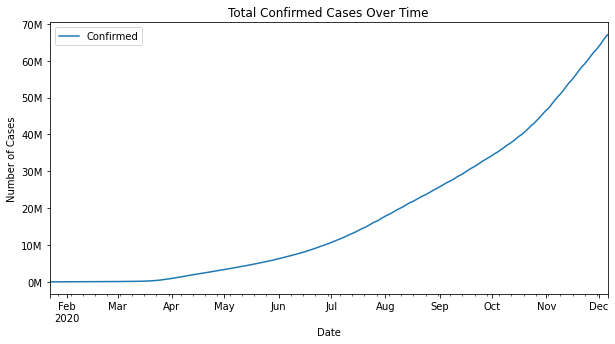

In [393]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

ax = dfl.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter) 

Let's choose a few specific countries to see how their confirmed cases compare

In [572]:
dftemp = df.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Country/Region'])
dftemp = dftemp.sort_values(by=['Confirmed'], ascending=False).astype(str).head(7)
dftemp

Country/Region ObservationDate       SNo   Confirmed    Deaths  \
49731             US      12/06/2020   9987689  14757000.0  282299.0   
21902          India      12/06/2020   6370326   9677203.0  140573.0   
6676          Brazil      12/06/2020   4648893   6603540.0  176941.0   
39600         Russia      12/06/2020  14293198   2439163.0   42675.0   
16846         France      12/06/2020   1893885   2345648.0   55247.0   
23645          Italy      12/06/2020   3616285   1728878.0   60078.0   
49411             UK      12/06/2020   2582103   1727751.0   61342.0   

       Recovered  
49731  5624444.0  
21902  9139901.0  
6676   5866657.0  
39600  1920744.0  
16846   175220.0  
23645   913494.0  
49411     3736.0

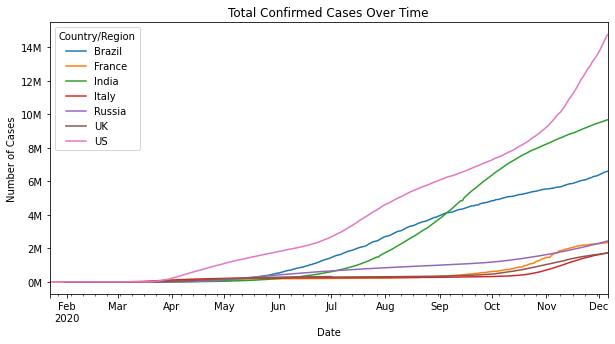

In [573]:
dfl = df.copy()

# Select the countries we want to see
country_list = dftemp['Country/Region'].tolist()
dfl = dfl.loc[dfl['Country/Region'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Country/Region','ObservationDate','Confirmed']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_confirmed['Confirmed'] = df_confirmed['Confirmed']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Country/Region', values='Confirmed')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter)

Let's take a look at the same graph but for deaths instead of total cases.

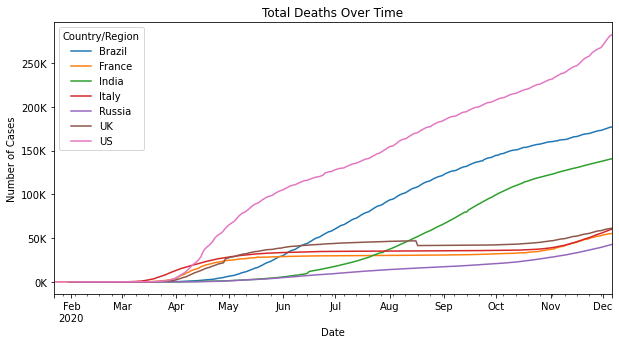

In [574]:
df_deaths = dfl.copy()
df_deaths = df_deaths[['Country/Region','ObservationDate','Deaths']]
# Convert the observation date strings to a pd datetime
df_deaths['ObservationDate'] = df_deaths['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_deaths['Deaths'] = df_deaths['Deaths']/1000
# Adjust dataframe for plotting
df_deaths = df_deaths.pivot(index='ObservationDate', columns='Country/Region', values='Deaths')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_deaths.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Deaths Over Time')

formatter = FormatStrFormatter('%0.0fK')
ax.yaxis.set_major_formatter(formatter)

While this graph is interesting, it doesn't tell us a whole lot about how each of these countries have handled the outbreak overall, since a country with a smaller population is far less likely to make it onto this list, even if a large percentage of the population was infected. Let's redo this analysis using cases as a percentage of the country's total population.

In [577]:
# Data from: https://population.un.org/wpp/Download/Standard/CSV/
df_pop = pd.read_csv('Data/WPP2019_TotalPopulationBySex.csv')
# We only want data for 2020
df_pop = df_pop[df_pop['Time'] == 2020]
# We want just one row per country
df_pop = df_pop.groupby(['Location', 'Time'], as_index=False).mean()
# Get rid of unnecessary columns
df_pop = df_pop[['Location','PopTotal']]
# Population is in thousands, let's fix that
df_pop['PopTotal'] = df_pop['PopTotal']*1000

# Rename 'Location' to 'Country/Region' so the merge works properly
df_pop = df_pop.rename(columns={'Location': 'Country/Region'})

Now we have a list of countries and population totals for the year 2020! Next we will want to merge this with our existing dataframe. We will use a left merge on the existing dataframe (since that's the most important one) and then take a look to see if we're missing any population data.

First we must see if there is any missing data. Using the code below, we will display only the countries whose population total is NaN, meaning that it did not merge properly with our population data.

In [578]:
# We will not be keeping this dataframe, hence why I used 'dftemp'
dftemp = df.copy()
# Left merge because we only care about countries that we have covid data for
dftemp = dftemp.merge(df_pop, on='Country/Region', how='left')
dftemp = dftemp[np.isnan(dftemp['PopTotal'])]
dftemp.groupby(['Country/Region'], as_index=False).mean()

Country/Region            SNo      Confirmed  \
0                       Azerbaijan    2664.000000       1.000000   
1                  ('St. Martin',)    4675.000000       2.000000   
2                     Bahamas, The    7253.666667       3.333333   
3                          Bolivia   76018.431734   69601.712177   
4                           Brunei   75495.948718     137.062271   
5                            Burma   80369.188235   15417.839216   
6                       Cape Verde    7585.000000       1.000000   
7              Congo (Brazzaville)   77094.973783    2761.700375   
8                 Congo (Kinshasa)   76033.948339    6831.221402   
9                          Curacao    5733.000000       1.000000   
10                  Czech Republic   73456.234875   90518.960854   
11                Diamond Princess   79827.649805     712.000000   
12                      East Timor    7589.000000       1.000000   
13                     Gambia, The    7141.750000       1.000000   
14                        Guernsey    6587.625000       0.375000   
15                       Hong Kong   64881.081250    2548.284375   
16                            Iran   70799.890411  305572.263699   
17                     Ivory Coast   75796.937500   11618.933824   
18                          Jersey    6579.000000       0.750000   
19                          Kosovo   78191.965779   10219.840304   
20                            Laos   79594.158915      21.120155   
21                      MS Zaandam   80718.622047       8.889764   
22                           Macau   64943.078125      38.390625   
23                  Mainland China   64959.045170    2546.921053   
24                         Moldova   75313.996350   32699.087591   
25                   North Ireland    2685.000000       1.000000   
26                          Others    3427.391304     570.173913   
27                       Palestine    3870.800000      17.200000   
28             Republic of Ireland    4067.000000      21.000000   
29           Republic of the Congo    6873.833333       0.166667   
30                         Reunion    6116.272727      12.454545   
31                          Russia  101297.522550   14182.890758   
32                Saint Barthelemy    3953.571429       2.428571   
33                     South Korea   64732.831250   14912.893750   
34                      St. Martin    4412.000000       2.000000   
35                           Syria   79107.211538    2273.242308   
36                          Taiwan   64744.350000     394.481250   
37                        Tanzania   77479.751880     438.026316   
38                     The Bahamas    6871.333333       0.500000   
39                      The Gambia    7019.000000       0.200000   
40                              UK   83280.639692   33870.759427   
41                              US   72297.957352   76987.073582   
42                    Vatican City    4124.000000       1.000000   
43                       Venezuela   76953.477612   35674.694030   
44                         Vietnam   64960.526646     576.670846   
45              West Bank and Gaza   80231.511719   22473.257812   
46  occupied Palestinian territory    5543.285714       3.571429   

          Deaths      Recovered  PopTotal  
0       0.000000       0.000000       NaN  
1       0.000000       0.000000       NaN  
2       0.000000       0.000000       NaN  
3    3722.612546   43647.557196       NaN  
4       2.278388     124.380952       NaN  
5     345.650980   10150.203922       NaN  
6       0.000000       0.000000       NaN  
7      52.258427    1728.322097       NaN  
8     176.136531    5322.457565       NaN  
9       0.000000       0.000000       NaN  
10   1229.569395   59609.946619       NaN  
11     12.805447     649.626459       NaN  
12      0.000000       0.000000       NaN  
13      0.000000       0.000000       NaN  
14      0.000000       0.000000       NaN  
15     40.859375    2207.271875       NaN  
16  167

Using this list, let's fill in as much of the missing data as we can. Unfortunately, we will not have data for every single country. However, smaller countries with little or no data likely won't have an effect on the analysis we are doing.

In [579]:
df_pop = df_pop.replace({'Country/Region':'Russian Federation'},'Russia')
df_pop = df_pop.replace({'Country/Region':'United States of America'},'US')
df_pop = df_pop.replace({'Country/Region':'Iran (Islamic Republic of)'},'Iran')
df_pop = df_pop.replace({'Country/Region':'Bahamas'},'Bahamas, The')
df_pop = df_pop.replace({'Country/Region':'Azerbaijan'},'Azerbaijan')
df_pop = df_pop.replace({'Country/Region':'United Kingdom'},'UK')
df_pop = df_pop.replace({'Country/Region':'Bolivia (Plurinational State of)'},'Bolivia')
df_pop = df_pop.replace({'Country/Region':'Brunei Darussalam'},'Brunei')
df_pop = df_pop.replace({'Country/Region':'Democratic Republic of the Congo'},'Congo (Kinshasa)')
df_pop = df_pop.replace({'Country/Region':'Congo'},'Congo (Brazzaville)')
df_pop = df_pop.replace({'Country/Region':'Curaçao'},'Curacao')
df_pop = df_pop.replace({'Country/Region':'Czechia'},'Czech Republic')
df_pop = df_pop.replace({'Country/Region':'Timor-Leste'},'East Timor')
df_pop = df_pop.replace({'Country/Region':'China, Hong Kong SAR'},'Hong Kong')
df_pop = df_pop.replace({'Country/Region':'China'},'Mainland China')
df_pop = df_pop.replace({'Country/Region':'Republic of Korea'},'South Korea')
df_pop = df_pop.replace({'Country/Region':'China, Taiwan Province of China'},'Taiwan')
df_pop = df_pop.replace({'Country/Region':'United Republic of Tanzania'},'Tanzania')
df_pop = df_pop.replace({'Country/Region':'Venezuela (Bolivarian Republic of)'},'Venezuela')

Then we can run our merge code again.

In [580]:
df_merge = df.copy()
df_merge = df_merge.merge(df_pop, on='Country/Region', how='left')

Finally, let's add a column that is confirmed cases divided by the population total to get us a confirmed percentage for each country.

In [581]:
df_merge['ConfirmedPercentage'] = df_merge['Confirmed']/df_merge['PopTotal']*100
df_merge.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered      PopTotal  ConfirmedPercentage  
0        1.0     0.0        0.0  1.439324e+09         6.947707e-08  
1       14.0     0.0        0.0  1.439324e+09         9.726790e-07  
2        6.0     0.0        0.0  1.439324e+09         4.168624e-07  
3        1.0     0.0        0.0  1.439324e+09         6.947707e-08  
4        0.0     0.0        0.0  1.439324e+09         0.000000e+00

***

Now let's do some analysis using our new ConfirmedPercentage category.

We'll start with another line graph. Let's see if our top 5 countries are the same using ConfirmedPercentage instead of Confirmed.

In [585]:
dftemp = df_merge.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Country/Region'])
dftemp = dftemp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(5)
dftemp

Country/Region ObservationDate     SNo Confirmed Deaths Recovered  \
1127         Andorra      12/06/2020  171724    7050.0   78.0    6238.0   
33049     Montenegro      12/06/2020  171826   38246.0  533.0   26999.0   
28550     Luxembourg      12/06/2020  171812   37017.0  345.0   28029.0   
40951     San Marino      12/05/2020  171090    1789.0   48.0    1412.0   
3660         Bahrain      12/06/2020  171732   87930.0  341.0   86030.0   

                 PopTotal ConfirmedPercentage  
1127              77265.0     9.1244418559503  
33049            628062.0   6.089526193273912  
28550   625975.9999999999   5.913485501041574  
40951   33937.99999999999   5.271377217278568  
3660   1701582.9999999998  5.1675410485412705

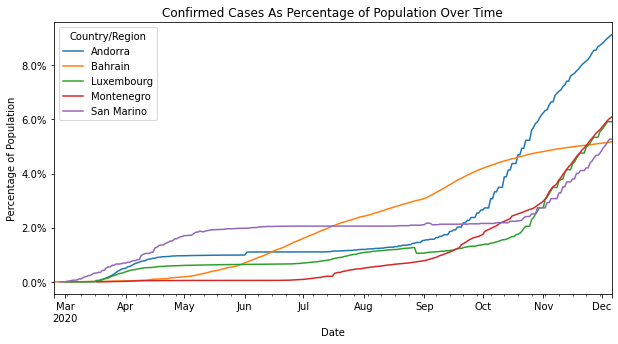

In [588]:
import matplotlib.ticker as mtick

dfl = df_merge.copy()

# Select the countries we want to see
# country_list = ['US','India','Brazil','Russia','France','Italy']
# country_list = ['Andorra','Montenegro','Luxembourg','San Marino','Bahrain','Czech Republic','Belgium','Qatar','Armenia','US']
country_list = dftemp['Country/Region'].tolist()
dfl = dfl.loc[dfl['Country/Region'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Country/Region','ObservationDate','ConfirmedPercentage']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
# df_confirmed['ConfirmedPercentage'] = df_confirmed['ConfirmedPercentage']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Country/Region', values='ConfirmedPercentage')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Population')
ax.set_title('Confirmed Cases As Percentage of Population Over Time')

formatter = mtick.PercentFormatter()
ax.yaxis.set_major_formatter(formatter)

This change to percentage of population gives us a bit more perspective. While the US is still in the top 10, it shows that their are a number of other countries with worse case rates relative to their total population. Andorra has a signficantly higher percentage than any other country at around 9%.

***

Next, we will be making a time-based choropleth to illustrate the spread of the virus over time. There are a few different use cases and ways we can display our data using a time slider choropleth. To start, we will use it to show the overall spread of the virus over time from its beginning last January 2020 until early December of 2020. 

I used the following website as a reference to better understand TimeSliderChoropleth. Some of its parameters such as styledict, have very little documentation. From: https://www.jumpingrivers.com/blog/interactive-maps-python-covid-19-spread/

We will start by simply making a copy of the dataframe so we can make modification to it specific to the time slider choropleth.

In [418]:
# dfc: Data frame choropleth
dfc = df.copy()
# dfc = dfc.dropna(how='all')
# dfc = dfc[dfc.Confirmed != 0]

Some countries have different labels than our geography database (which we will get to below). We must fix these labels so that they match.

In [419]:
dfc = dfc.replace({'Country/Region':'US'},'United States of America')
dfc = dfc.replace({'Country/Region':'Mainland China'},'China')

Some countries are broken down by province/state. This means that the data is dispersed throughout these regions. Our geographic data only accounts for countries, so we will have to sum the data for the country as a whole.

In [420]:
dfc = dfc.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

In [421]:
# Convert time to proper format for TimeSliderChoropleth
dfc['ObservationDate'] = pd.to_datetime(dfc['ObservationDate']).astype(int) / 10**9

# Take log of data since some countries have significantly high populations than others
dfc['Confirmed Adjusted'] = dfc['Confirmed'].apply(lambda x: math.log10(1+x)) # Add 1 to account for zeros

Next we need to calculate the color data for the TimeSliderChoropleth. This color map will evenly distribute a range of color hex's across a dataframe column based on their values. In this case, the color map is being applied to the number of confirmed cases. The specific color map used doesn't affect the data, just the colors used in the map.

In [422]:
max_color = max(dfc['Confirmed Adjusted'])
min_color = min(dfc['Confirmed Adjusted'])
cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
dfc['Color'] = dfc['Confirmed Adjusted'].apply(cmap)

First we must get the geography data for all countries. This is done using the geopandas dataset. Found here: https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/TimeSliderChoropleth.ipynb

In [423]:
import geopandas as gpd
assert "naturalearth_lowres" in gpd.datasets.available
datapath = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(datapath)

Next, we must create a style dictionary to store the color and opacity values for each date for each country. This is stored as a dictionary of dictionaries. Each entry in the dictionary correlates to a country and then the inner dictionary contains color values for each date.
<br><br>
A styledict is defined as: A dictionary where the keys are the geojson feature ids and the values are dicts of {time: style_options_dict}

In [424]:
styledict = {}

for index, row in gdf.iterrows():
    cdata = dfc[dfc['Country/Region'] == row['name']]
    temp_dict = {}
    
    for i, r in cdata.iterrows():
        temp_dict[str(r['ObservationDate'])] = {'color': r['Color'], 'opacity': 0.8}

    styledict[str(index)] = temp_dict

Finally, we need to create the folium map

In [425]:
map_osm = folium.Map(min_zoom=2, max_bounds=True)

g = TimeSliderChoropleth(
    data=gdf.to_json(),
    styledict=styledict,
).add_to(map_osm)

_ = cmap.add_to(map_osm)

map_osm

***

As a US citizen who is much more familiar with the scope of political, legal, and cultural differences in different areas throughout the country, I would love to take a look at how COVID-19 has affected different states within the US. This analysis could easily be done using state or provincial data in another country. For this tutorial, I will use the US. I also believe the US is a great country to do this on because there are vast changes in population density, geography, climate, and culture from state to state. I would love to do some analysis to see if we can find any statistically significant correlation between any of these factors and the rates of cases for COVID-19. Let's get started!

First we will need to create a dataframe with just the data for each US state.

In [430]:
df_us = df.copy()
df_us = df_us[df_us['Country/Region']=='US']

Next, we will repeat the steps above to create a line graph for the top worst states in terms of cases. I won't include explantations since we have already done all this above.

In [516]:
dftemp = df_us.copy()
dftemp = dftemp.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Province/State'])
dftemp = dftemp.sort_values(by=['Confirmed'], ascending=False).astype(str).head(5)

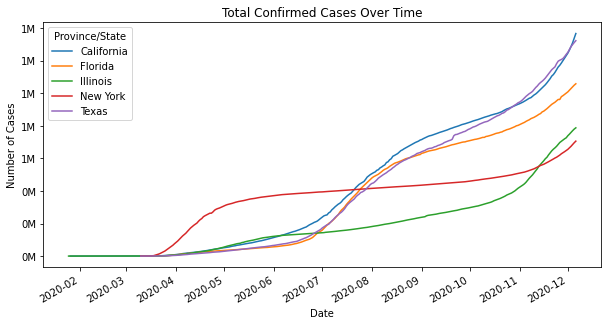

In [517]:
dfl = df_us.copy()

# Select the countries we want to see
state_list = dftemp['Province/State'].tolist()
dfl = dfl.loc[dfl['Province/State'].isin(state_list)]

# Repeat steps from last line graph
dfl = dfl.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Province/State','ObservationDate','Confirmed']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_confirmed['Confirmed'] = df_confirmed['Confirmed']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Province/State', values='Confirmed')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter)

In [518]:
# https://population.un.org/wpp/Download/Standard/CSV/
df_pop = pd.read_csv('Data/State Populations.csv')
# df_pop = df_pop.drop([1,2,3,4])
# df_pop = df_pop[df_pop['Time'] == 2020]
# df_pop = df_pop.groupby(['Location', 'Time'], as_index=False).mean()
# df_pop = df_pop[['Location','PopTotal']]
# # Population is in thousands, let's fix that
# df_pop['PopTotal'] = df_pop['PopTotal']*1000

# # Rename 'Location' to 'Country/Region' so the merge works properly
df_pop = df_pop.rename(columns={'State': 'Province/State'})
df_pop = df_pop.rename(columns={'2018 Population': 'PopTotal'})

df_pop

Province/State  PopTotal
0             California  39776830
1                  Texas  28704330
2                Florida  21312211
3               New York  19862512
4           Pennsylvania  12823989
5               Illinois  12768320
6                   Ohio  11694664
7                Georgia  10545138
8         North Carolina  10390149
9               Michigan   9991177
10            New Jersey   9032872
11              Virginia   8525660
12            Washington   7530552
13               Arizona   7123898
14         Massachusetts   6895917
15             Tennessee   6782564
16               Indiana   6699629
17              Missouri   6135888
18              Maryland   6079602
19             Wisconsin   5818049
20              Colorado   5684203
21             Minnesota   5628162
22        South Carolina   5088916
23               Alabama   4888949
24             Louisiana   4682509
25              Kentucky   4472265
26                Oregon   4199563
27              Oklahoma   3940521
28           Connecticut   3588683
29                  Iowa   3160553
30                  Utah   3159345
31                Nevada   3056824
32              Arkansas   3020327
33           Mississippi   2982785
34                Kansas   2918515
35            New Mexico   2090708
36              Nebraska   1932549
37         West Virginia   1803077
38                 Idaho   1753860
39                Hawaii   1426393
40         New Hampshire   1350575
41                 Maine   1341582
42               Montana   1062330
43          Rhode Island   1061712
44              Delaware    971180
45          South Dakota    877790
46          North Dakota    755238
47                Alaska    738068
48  District of Columbia    703608
49               Vermont    623960
50               Wyoming    573720

In [519]:
df_merge = df_us.copy()
df_merge = df_merge.merge(df_pop, on='Province/State', how='inner')

df_merge['ConfirmedPercentage'] = df_merge['Confirmed']/df_merge['PopTotal']*100
df_merge.tail(1000)

SNo ObservationDate Province/State Country/Region  \
12897   34525      06/03/2020   South Dakota             US   
12898   35190      06/04/2020   South Dakota             US   
12899   35868      06/05/2020   South Dakota             US   
12900   36553      06/06/2020   South Dakota             US   
12901   37238      06/07/2020   South Dakota             US   
12902   37924      06/08/2020   South Dakota             US   
12903   38609      06/09/2020   South Dakota             US   
12904   39328      06/10/2020   South Dakota             US   
12905   40056      06/11/2020   South Dakota             US   
12906   40786      06/12/2020   South Dakota             US   
12907   41516      06/13/2020   South Dakota             US   
12908   42246      06/14/2020   South Dakota             US   
12909   42976      06/15/2020   South Dakota             US   
12910   43706      06/16/2020   South Dakota             US   
12911   44436      06/17/2020   South Dakota             US   
12912   45166      06/18/2020   South Dakota             US   
12913   45896      06/19/2020   South Dakota             US   
12914   46626      06/20/2020   South Dakota             US   
12915   47356      06/21/2020   South Dakota             US   
12916   48086      06/22/2020   South Dakota             US   
12917   48816      06/23/2020   South Dakota             US   
12918   49546      06/24/2020   South Dakota             US   
12919   50276      06/25/2020   South Dakota             US   
12920   51006      06/26/2020   South Dakota             US   
12921   51736      06/27/2020   South Dakota             US   
12922   52466      06/28/2020   South Dakota             US   
12923   53196      06/29/2020   South Dakota             US   
12924   53926      06/30/2020   South Dakota             US   
12925   54656      07/01/2020   South Dakota             US   
12926   55386      07/02/2020   South Dakota             US   
12927   56116      07/03/2020   South Dakota             US   
12928   56846      07/04/2020   South Dakota             US   
12929   57576      07/05/2020   South Dakota             US   
12930   58306      07/06/2020   South Dakota             US   
12931   59036      07/07/2020   South Dakota             US   
12932   59766      07/08/2020   South Dakota             US   
12933   60496      07/09/2020   South Dakota             US   
12934   61226      07/10/2020   South Dakota             US   
12935   61956      07/11/2020   South Dakota             US   
12936   62686      07/12/2020   South Dakota             US   
12937   63416      07/13/2020   South Dakota             US   
12938   64146      07/14/2020   South Dakota             US   
12939   64876      07/15/2020   South Dakota             US   
12940   65606      07/16/2020   South Dakota             US   
12941   66344      07/17/2020   South Dakota             US   
12942   67087      07/18/2020   South Dakota             US   
12943   67830      07/19/2020   South Dakota             US   
12944   68573      07/20/2020   South Dakota             US   
12945   69316      07/21/2020   South Dakota             US   
12946   70059      07/22/2020   South Dakota             US   
12947   70802      07/23/2020   South Dakota             US   
12948   71545      07/24/2020   South Dakota             US   
12949   72288      07/25/2020   South Dakota             US   
12950   73031      07/26/2020   South Dakota             US   
12951   73774      07/27/2020   South Dakota             US   
12952   74518      07/28/2020   South Dakota             US   
12953   75262      07/29/2020   South Dakota             US   
12954   76006      07/30/2020   South Dakota             US   
12955   76750      07/31/2020   South Dakota             US   
12956   77494      08/01/2020   South Dakota             US   
12957   78238      08/02/2020   South Dakota             US   
12958   78982      08/03/2020   South Dakota             US   
12959   79726      08/04/2020   South Dak

In [565]:
dftemp = df_merge.copy()
# dftemp = dftemp.groupby(['Province/State', 'ObservationDate'], as_index=False).mean()
dftemp = dftemp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Province/State'])
dftemp = dftemp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(5)

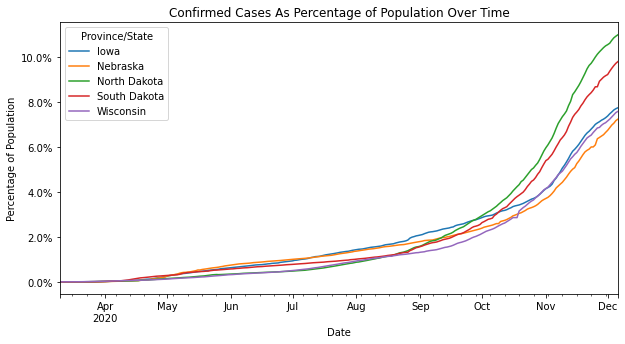

In [566]:
dfl = df_merge.copy()

# Select the countries we want to see
# country_list = ['US','India','Brazil','Russia','France','Italy']
country_list = dftemp['Province/State'].tolist()
dfl = dfl.loc[dfl['Province/State'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Province/State','ObservationDate','ConfirmedPercentage']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
# df_confirmed['ConfirmedPercentage'] = df_confirmed['ConfirmedPercentage']/1000000
# Adjust dataframe for plotting
df_plot = df_confirmed.copy()
df_plot = df_plot.pivot(index='ObservationDate', columns='Province/State', values='ConfirmedPercentage')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_plot.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Population')
ax.set_title('Confirmed Cases As Percentage of Population Over Time')

formatter = mtick.PercentFormatter()
ax.yaxis.set_major_formatter(formatter)

In [561]:
df_partisan = pd.io.stata.read_stata('Data/shor mccarty 1993-2018 state aggregate data July 2020 release.dta')
# df_partisan.to_csv('shor mccarty.csv')
df_partisan[df_partisan['year']==2018]

st  alpha  fips  icpsr  year  hou_chamber  sen_chamber  hou_dem  \
25    AK      2     2     81  2018        0.168        0.468   -0.592   
51    AL      1     1     41  2018        0.798        1.027   -0.494   
77    AR      4     5     42  2018        1.030        1.065   -0.189   
103   AZ      3     4     61  2018        0.932        0.700   -1.682   
129   CA      5     6     71  2018       -1.185       -1.406   -1.778   
155   CO      6     8     62  2018       -1.115        0.879   -1.397   
181   CT      7     9      1  2018       -0.921       -0.505   -1.162   
207   DE      8    10     11  2018       -0.829       -0.454   -0.959   
233   FL      9    12     43  2018        0.520        0.424   -1.237   
259   GA     10    13     44  2018        0.759        0.806   -0.762   
285   HI     11    15     82  2018          NaN          NaN      NaN   
311   IA     15    19     31  2018          NaN          NaN      NaN   
337   ID     12    16     63  2018        0.889        0.903   -0.968   
363   IL     13    17     21  2018       -0.145       -0.404   -1.152   
389   IN     14    18     22  2018        0.859        0.842   -0.544   
415   KS     16    20     32  2018        0.261        0.294   -0.752   
441   KY     17    21     51  2018        0.669        0.825   -0.424   
467   LA     18    22     45  2018        0.602        0.451   -0.525   
493   MA     21    25      3  2018       -1.109       -1.098   -1.148   
519   MD     20    24     52  2018       -0.976       -0.861   -1.228   
545   ME     19    23      2  2018       -0.721        0.274   -1.132   
571   MI     22    26     23  2018        0.381        0.589   -0.997   
597   MN     23    27     33  2018        0.711        0.345   -1.187   
623   MO     25    29     34  2018        1.148        1.055   -1.015   
649   MS     24    28     46  2018        0.608        0.826   -0.518   
675   MT     26    30     64  2018        0.767        0.721   -1.142   
701   NC     33    37     47  2018        0.752        0.880   -0.824   
727   ND     34    38     36  2018        0.707        0.726   -0.453   
753   NE     27    31     35  2018          NaN        0.522      NaN   
779   NH     29    33      4  2018        0.390        0.689   -1.017   
805   NJ     30    34     12  2018       -1.005       -0.940   -1.130   
831   NM     31    35     66  2018       -0.845       -0.652   -1.299   
857   NV     28    32     65  2018       -0.705       -0.494   -0.746   
883   NY     32    36     13  2018       -1.109       -0.277   -1.366   
909   OH     35    39     24  2018        0.677        0.834   -0.828   
935   OK     36    40     53  2018        1.147        1.124   -0.103   
961   OR     37    41     72  2018       -0.725       -0.724   -1.278   
987   PA     38    42     14  2018        0.404        0.392   -0.693   
1013  RI     39    44      5  2018       -0.572       -0.523   -0.610   
1039  SC     40    45     48  2018        0.802        0.590   -0.699   
1065  SD     41    46     37  2018        0.638        0.759   -0.262   
1091  TN     42    47     54  2018        0.912        0.921   -0.628   
1117  TX     43    48     49  2018        1.031        1.237   -1.200   
1143  UT     44    49     67  2018        0.722        0.795   -1.079   
1169  VA     46    51     40  2018        0.034        0.600   -1.018   
1195  VT     45    50      6  2018       -0.587       -0.924   -1.009   
1221  WA     47    53     73  2018       -0.596        0.078   -1.467   
1247  WI     49    55     25  2018        0.705        0.683   -1.255   
1273  WV     48    54     56  2018        0.672        0.679   -0.335   
1299  WY     50    56     68  2018        0.463        0.411   -0.915   

      hou_rep  hou_majority  hou_minority  hou_dem_mean  hou_rep_mean  \
25      0.857         0.857        -0.592     -0.636257      0.837661   
51      0.865         0.865        -0.494     -0.472912      0.883134   
77      1.115         1.115        -0.189     -0.302600      1.

In [562]:
# .dta file meant for stata program; luckily pandas can read this
df_partisan = pd.io.stata.read_stata('Data/stateideology_v2018.dta')
# df_partisan.to_csv('shor mccarty.csv')
years = [2010,2011,2012,2013,2014,2015,2016,2017]
df_partisan = df_partisan[df_partisan['year'].isin(years)]

# For some reason, 2014 and 2015 are missing the state names
# This code fills in that missing data
df_partisan = df_partisan.replace(r'^\s*$', np.nan, regex=True)
df_partisan = df_partisan.fillna(method='ffill')

# Let's sum the values for the last 6 years
df_partisan = df_partisan.groupby(['statename'], as_index=False).mean()
df_partisan.sort_values('citi6016', ascending=True)

# Let's also make sure the columns align
df_partisan = df_partisan.rename(columns={'statename': 'Province/State'})

In [538]:
# df confirmed partisan
df_cp = df_confirmed.copy()
df_cp = df_cp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Province/State'])
df_cp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(10)

df_cp = df_cp.merge(df_partisan, on='Province/State', how='inner')
df_cp

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0     North Dakota      2020-12-06            10.987397   34.0  2013.5   
1     South Dakota      2020-12-06             9.796307   41.0  2013.5   
2             Iowa      2020-12-06             7.742031   15.0  2013.5   
3        Wisconsin      2020-12-06             7.581012   49.0  2013.5   
4         Nebraska      2020-12-06             7.235729   27.0  2013.5   
5             Utah      2020-12-06             6.818090   44.0  2013.5   
6          Montana      2020-12-06             6.389258   26.0  2013.5   
7          Wyoming      2020-12-06             6.312836   50.0  2013.5   
8            Idaho      2020-12-06             6.300959   12.0  2013.5   
9        Minnesota      2020-12-06             6.234042   23.0  2013.5   
10        Illinois      2020-12-06             6.168180   13.0  2013.5   
11       Tennessee      2020-12-06             5.906233   42.0  2013.5   
12          Kansas      2020-12-06             5.871616   16.0  2013.5   
13    Rhode Island      2020-12-05             5.852529   39.0  2013.5   
14         Indiana      2020-12-06             5.696092   14.0  2013.5   
15        Arkansas      2020-12-06             5.659122    4.0  2013.5   
16     Mississippi      2020-12-06             5.529430   24.0  2013.5   
17         Alabama      2020-12-06             5.520143    1.0  2013.5   
18          Nevada      2020-12-06             5.500480   28.0  2013.5   
19        Oklahoma      2020-12-06             5.493842   36.0  2013.5   
20        Missouri      2020-12-06             5.368742   25.0  2013.5   
21       Louisiana      2020-12-06             5.363001   18.0  2013.5   
22      New Mexico      2020-12-06             5.169923   31.0  2013.5   
23         Arizona      2020-12-06             5.113436    3.0  2013.5   
24          Alaska      2020-12-06             5.017966    2.0  2013.5   
25         Florida      2020-12-06             4.964637    9.0  2013.5   
26         Georgia      2020-12-06             4.754845   10.0  2013.5   
27           Texas      2020-12-06             4.608148   43.0  2013.5   
28        Colorado      2020-12-06             4.584301    6.0  2013.5   
29  South Carolina      2020-12-06             4.560873   40.0  2013.5   
30        Kentucky      2020-12-06             4.486116   17.0  2013.5   
31        Michigan      2020-12-06             4.269527   22.0  2013.5   
32        Delaware      2020-12-06             4.109640    8.0  2013.5   
33      New Jersey      2020-12-06             4.074186   30.0  2013.5   
34            Ohio      2020-12-06             4.061887   35.0  2013.5   
35  North Carolina      2020-12-06             3.801582   33.0  2013.5   
36   Massachusetts      2020-12-06             3.724581   21.0  2013.5   
37     Connecticut      2020-12-04             3.558826    7.0  2013.5   
38        New York      2020-12-06             3.553564   32.0  2013.5   
39        Maryland      2020-12-06             3.536860   20.0  2013.5   
40      California      2020-12-06             3.435852    5.0  2013.5   
41    Pennsylvania      2020-12-06             3.299285   38.0  2013.5   
42   West Virginia      2020-12-06             3.050175   48.0  2013.5   
43        Virginia      2020-12-06             2.991592   46.0  2013.5   
44      Washington      2020-12-06             2.356361   47.0  2013.5   
45          Oregon      2020-12-06             2.012019   37.0  2013.5   
46   New Hampshire      2020-12-06             1.842771   29.0  2013.5   
47          Hawaii      2020-12-06             1.320954   11.0  2013.5   
48           Maine      2020-12-06             0.994945   19.0  2013.5   
49         Vermont      2020-12-06             0.803737   45.0  2013.5   

     citi6016  inst6017_nom  
0   37.470074     31.959690  
1   41.013592     29.533453  
2   46.159096     37.510956  
3   50.004566     28.398251  
4   28.545771     28.794172  
5   24.685074     20.329941  
6   48.223011     4

R Squared: 0.30424062284971515


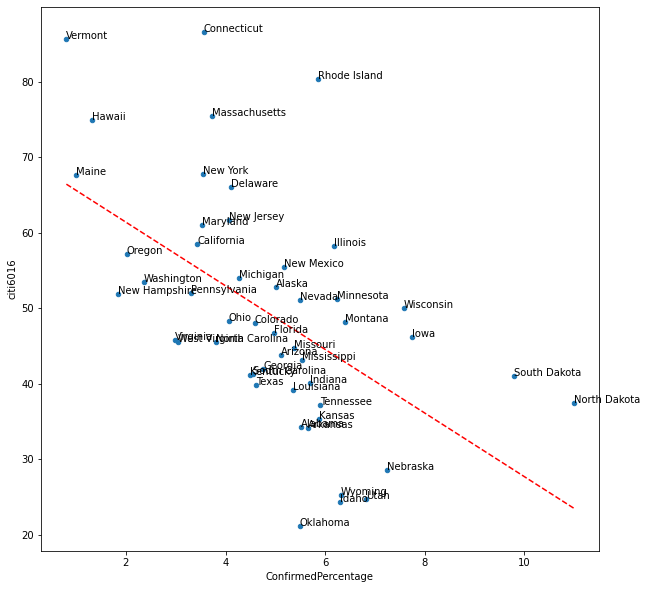

In [558]:
x = df_cp['ConfirmedPercentage']
y = df_cp['citi6016']
ax = df_cp.plot(x='ConfirmedPercentage',y='citi6016',kind='scatter',figsize=(10,10))
df_cp[['ConfirmedPercentage','citi6016','Province/State']].apply(lambda x: ax.text(*x),axis=1)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

import scipy
from scipy import stats
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))

In [591]:
# Data from: https://www.census.gov/data/tables/2010/dec/density-data-text.html
df_density = pd.read_csv('Data/pop_density.csv')
df_density = df_density[['STATE_OR_REGION','2010_DENSITY']]
df_density.head(100)

STATE_OR_REGION 2010_DENSITY
0          United States         87.4
1                Alabama         94.4
2                 Alaska          1.2
3                Arizona         56.3
4               Arkansas           56
5             California        239.1
6               Colorado         48.5
7            Connecticut        738.1
8               Delaware        460.8
9   District of Columbia     9,856.50
10               Florida        350.6
11               Georgia        168.4
12                Hawaii        211.8
13                 Idaho           19
14              Illinois        231.1
15               Indiana          181
16                  Iowa         54.5
17                Kansas         34.9
18              Kentucky        109.9
19             Louisiana        104.9
20                 Maine         43.1
21              Maryland        594.8
22         Massachusetts        839.4
23              Michigan        174.8
24             Minnesota         66.6
25           Mississippi         63.2
26              Missouri         87.1
27               Montana          6.8
28              Nebraska         23.8
29                Nevada         24.6
30         New Hampshire          147
31            New Jersey     1,195.50
32            New Mexico           17
33              New York        411.2
34        North Carolina        196.1
35          North Dakota          9.7
36                  Ohio        282.3
37              Oklahoma         54.7
38                Oregon         39.9
39          Pennsylvania        283.9
40          Rhode Island     1,018.10
41        South Carolina        153.9
42          South Dakota         10.7
43             Tennessee        153.9
44                 Texas         96.3
45                  Utah         33.6
46               Vermont         67.9
47              Virginia        202.6
48            Washington        101.2
49         West Virginia         77.1
50             Wisconsin          105
51               Wyoming          5.8
52           Puerto Rico     1,088.20

In [ ]:
`